In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread


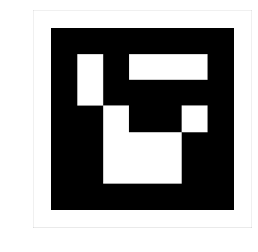

In [5]:
img = imread('images.png')
imggray = rgb2gray(img)
plt.imshow(imggray, cmap="gray")
plt.axis("off")
plt.show()


In [15]:
from scipy import signal as sig
import numpy as np

#finding the gradient in both x and y direction     
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)
Ixx = I_x ** 2
Ixy = I_y * I_x
Iyy = I_y ** 2
print(imggray.shape)


(224, 225)


In [17]:
#kernel 
k = 0.05
height, width = imggray.shape
harris_response = []
window_size = 6
offset =int( window_size/2)
print (height,width,window_size,offset,height-offset)

In [ ]:
#looking for corners append them to haris reponse array
#r is the variable determines if this a corner or not
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        #Find determinant and trace, use to get corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        
        harris_response.append([x,y, r])


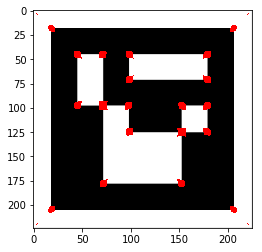

In [ ]:
output = np.copy(img)
#if r>0 this is a corner
for response in harris_response:
    x, y, r = response
    if r > 0:
        #colouring the corneres
        output[y,x] = [255,0,0]

        
plt.imshow(output)
plt.show()